In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Load the cleaned dataset
df = pd.read_csv("wesad_cleaned_ready.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (19218, 33)


,subject,label,HR_mean,HR_std,HRV_SDNN,HRV_RMSSD,pNN50,RR_mean,RR_std,IBI_median,...,ACC_mean_magnitude,ACC_std,ACC_energy,ACC_rms_x,ACC_rms_y,ACC_rms_z,ACC_mean_x,ACC_mean_y,ACC_mean_z,binary_label
0,S2,0,-0.352472,0.570709,0.943942,1.226230,0.970675,0.473431,0.957488,0.521955,...,0.967881,2.016398,1.168213,0.876720,-0.195090,-0.022528,1.041562,0.773430,0.297084,0
1,S2,0,-0.988687,-1.481235,-1.276818,-1.206663,-0.970973,0.577105,-1.291198,0.521955,...,-0.437756,-0.502013,-0.450276,0.848970,-0.211087,-0.257864,1.041028,0.806481,0.303236,0
2,S2,0,-0.961421,-1.366883,-1.013295,-0.880416,-0.970973,0.562295,-1.024361,0.426553,...,-0.256894,0.672890,-0.179023,0.147534,0.990514,-0.608169,0.685927,-0.404503,-0.019750,0
3,S2,0,-0.072828,0.734859,0.516522,-0.072244,1.051577,0.095760,0.524693,0.378852,...,-0.333374,0.768987,-0.220010,-1.227830,1.877485,-1.025255,0.208117,-1.804709,-0.236766,0
4,S2,0,0.604022,0.489516,0.013187,-0.010176,0.107720,-0.693317,0.015029,-0.718269,...,-0.801375,-0.145719,-0.713724,-1.767189,1.961760,-0.942155,0.116698,-1.975447,-0.117261,0


In [7]:
# 2 Identify feature columns
feature_cols = [c for c in df.columns if c not in ["subject", "label", "binary_label"]]
print(f"Number of features: {len(feature_cols)}")
print("Example features:", feature_cols[:10])

Number of features: 30
Example features: ['HR_mean', 'HR_std', 'HRV_SDNN', 'HRV_RMSSD', 'pNN50', 'RR_mean', 'RR_std', 'IBI_median', 'IBI_IQR', 'TINN']


In [8]:
print("\nBasic dataset info:")
df.info()

print("\nDescriptive statistics:")
display(df.describe().T)

print("\nMissing values per column:")
display(df.isna().sum().sort_values(ascending=False))



Basic dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19218 entries, 0 to 19217
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   subject             19218 non-null  object 
 1   label               19218 non-null  int64  
 2   HR_mean             19218 non-null  float64
 3   HR_std              19218 non-null  float64
 4   HRV_SDNN            19218 non-null  float64
 5   HRV_RMSSD           19218 non-null  float64
 6   pNN50               19218 non-null  float64
 7   RR_mean             19218 non-null  float64
 8   RR_std              19218 non-null  float64
 9   IBI_median          19218 non-null  float64
 10  IBI_IQR             19218 non-null  float64
 11  TINN                19218 non-null  float64
 12  EDA_mean            19218 non-null  float64
 13  EDA_std             19218 non-null  float64
 14  EDA_median          19218 non-null  float64
 15  EDA_slope           19218 non-nu

,count,mean,std,min,25%,50%,75%,max
label,19218.0,5.543241e-01,0.735505,0.000000,0.000000,0.000000,1.000000,2.000000
HR_mean,19218.0,3.549386e-16,1.000026,-3.010765,-0.762686,-0.052731,0.692260,3.598116
HR_std,19218.0,2.839509e-16,1.000026,-1.812567,-0.873021,0.026760,0.822778,2.988114
HRV_SDNN,19218.0,2.602883e-16,1.000026,-1.802160,-0.624998,-0.068610,0.505030,20.088775
HRV_RMSSD,19218.0,-2.366257e-16,1.000026,-1.672709,-0.615321,-0.082758,0.483342,25.048928
pNN50,19218.0,5.087453e-16,1.000026,-2.912621,-0.395670,0.323459,0.711789,1.294283
RR_mean,19218.0,-1.893006e-16,1.000026,-2.450359,-0.707716,-0.094309,0.591916,9.098147
RR_std,19218.0,-1.064816e-16,1.000026,-1.823146,-0.630733,-0.068087,0.512446,17.926755
IBI_median,19218.0,-2.129632e-16,1.000026,-2.435502,-0.718269,-0.050456,0.617357,8.249505
IBI_IQR,19218.0,0.000000e+00,1.000026,-1.499636,-0.778754,-0.109364,0.585772,12.866506



Missing values per column:


subject               0
SCR_mean_amp          0
ACC_mean_z            0
ACC_mean_y            0
ACC_mean_x            0
ACC_rms_z             0
ACC_rms_y             0
ACC_rms_x             0
ACC_energy            0
ACC_std               0
ACC_mean_magnitude    0
Resp_rate_var         0
Resp_amp_std          0
Resp_amp_mean         0
Resp_rate             0
SCL_tonic_mean        0
SCR_peaks_per_min     0
label                 0
EDA_slope             0
EDA_median            0
EDA_std               0
EDA_mean              0
TINN                  0
IBI_IQR               0
IBI_median            0
RR_std                0
RR_mean               0
pNN50                 0
HRV_RMSSD             0
HRV_SDNN              0
HR_std                0
HR_mean               0
binary_label          0
dtype: int64

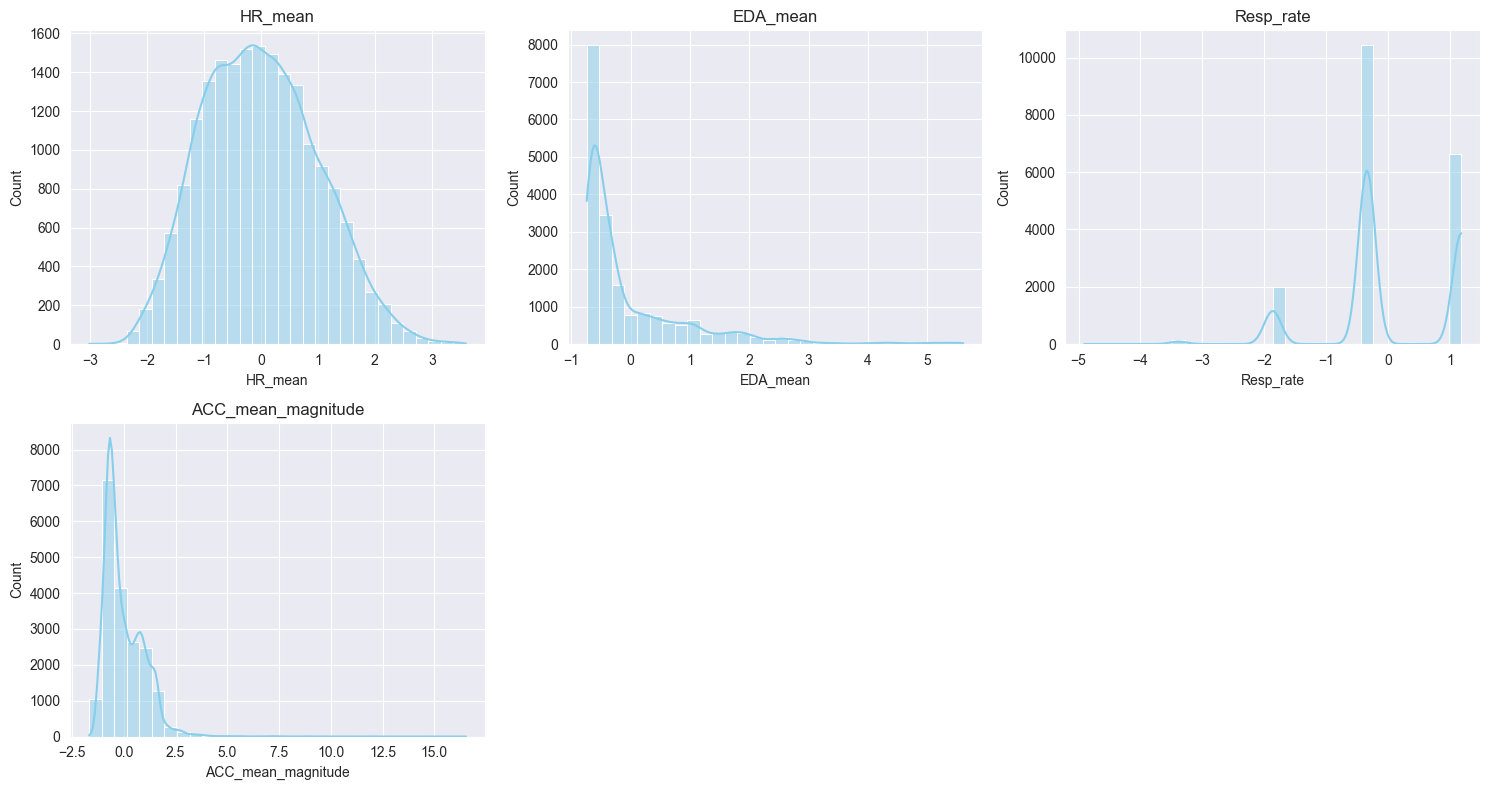

In [9]:
cols_to_plot = ["HR_mean", "EDA_mean", "Resp_rate", "ACC_mean_magnitude"]

plt.figure(figsize=(15,8))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()


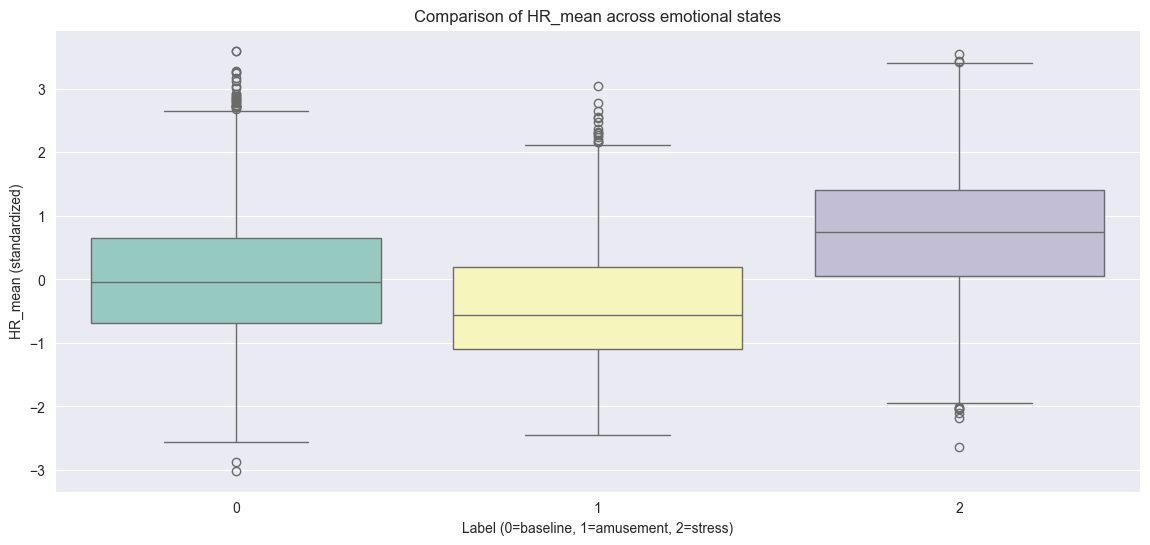

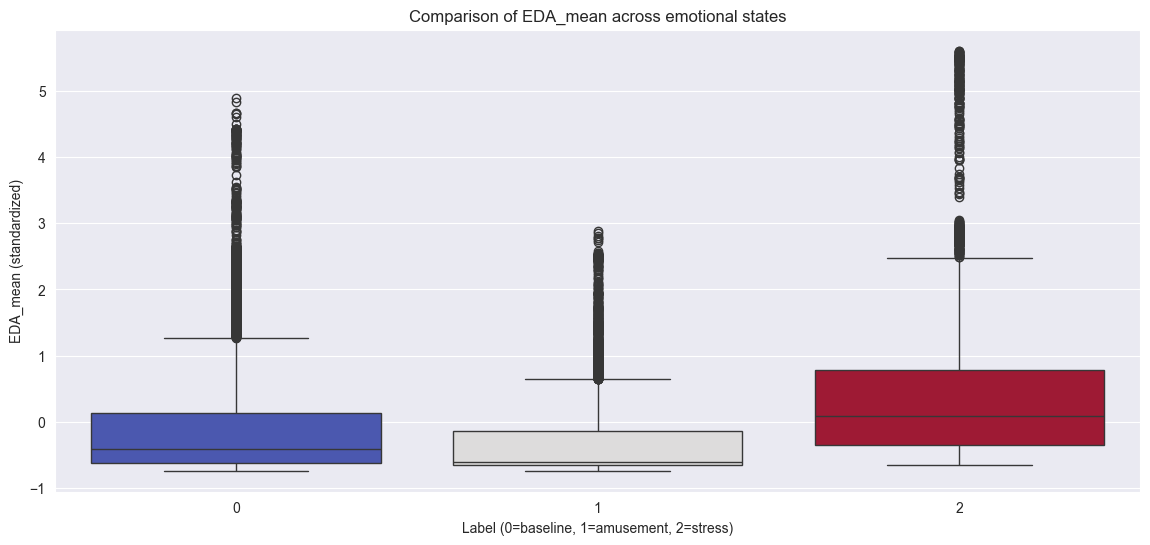

In [10]:
# ============================================================
# Exploratory Data Analysis: Comparison of features across emotional states
# Clean version (no FutureWarnings in Seaborn ≥0.14)
# ============================================================

plt.figure(figsize=(14, 6))
sns.boxplot(x="label", y="HR_mean", hue="label", data=df, palette="Set3", legend=False)
plt.title("Comparison of HR_mean across emotional states")
plt.xlabel("Label (0=baseline, 1=amusement, 2=stress)")
plt.ylabel("HR_mean (standardized)")
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x="label", y="EDA_mean", hue="label", data=df, palette="coolwarm", legend=False)
plt.title("Comparison of EDA_mean across emotional states")
plt.xlabel("Label (0=baseline, 1=amusement, 2=stress)")
plt.ylabel("EDA_mean (standardized)")
plt.show()



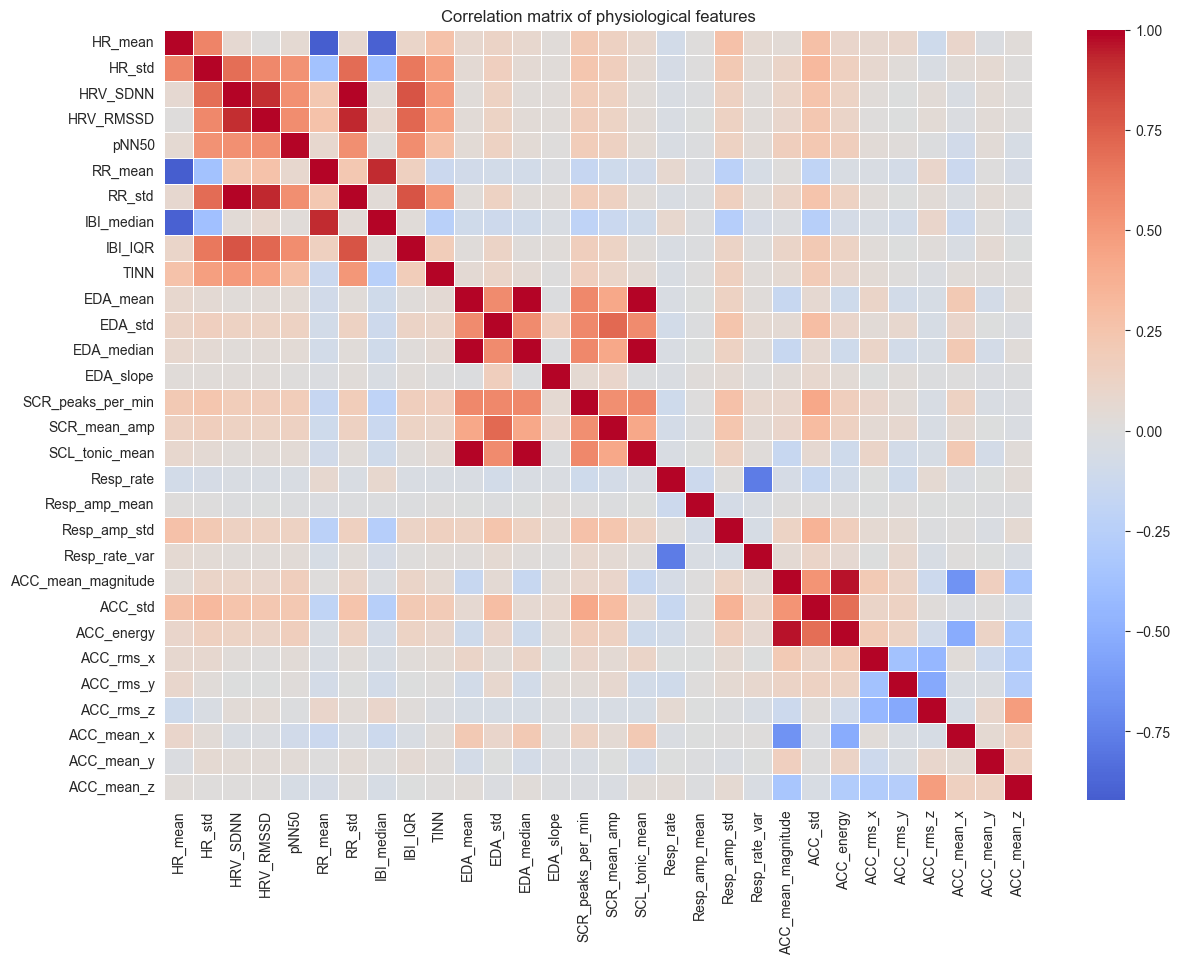

In [11]:
plt.figure(figsize=(14,10))
corr = df[feature_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation matrix of physiological features")
plt.show()


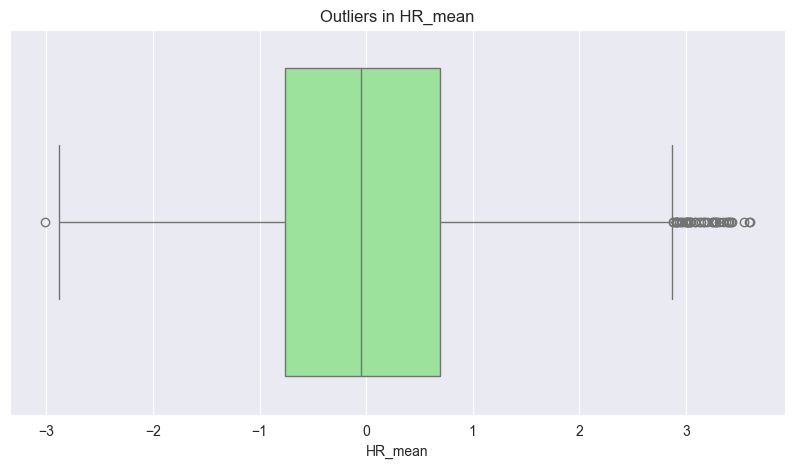

Dataset shape after outlier removal: (19174, 33)


In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["HR_mean"], color="lightgreen")
plt.title("Outliers in HR_mean")
plt.show()

Q1 = df["HR_mean"].quantile(0.25)
Q3 = df["HR_mean"].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df["HR_mean"] < (Q1 - 1.5 * IQR)) |
                            (df["HR_mean"] > (Q3 + 1.5 * IQR)))]
print("Dataset shape after outlier removal:", df_no_outliers.shape)


In [13]:
print("Final dataset shape:", df.shape)
print("Number of features:", len(feature_cols))
print("Example feature names:", feature_cols[:10])


Final dataset shape: (19218, 33)
Number of features: 30
Example feature names: ['HR_mean', 'HR_std', 'HRV_SDNN', 'HRV_RMSSD', 'pNN50', 'RR_mean', 'RR_std', 'IBI_median', 'IBI_IQR', 'TINN']


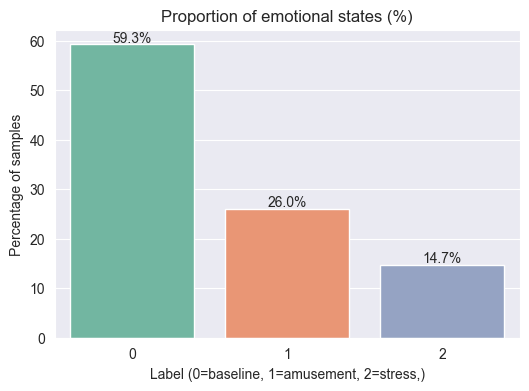

In [14]:
# ============================================================
# Class Balance (in %)
# ============================================================

class_counts = df["label"].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="Set2", legend=False)
plt.title("Proportion of emotional states (%)")
plt.xlabel("Label (0=baseline, 1=amusement, 2=stress,)")
plt.ylabel("Percentage of samples")
for i, val in enumerate(class_counts.values):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)
plt.show()


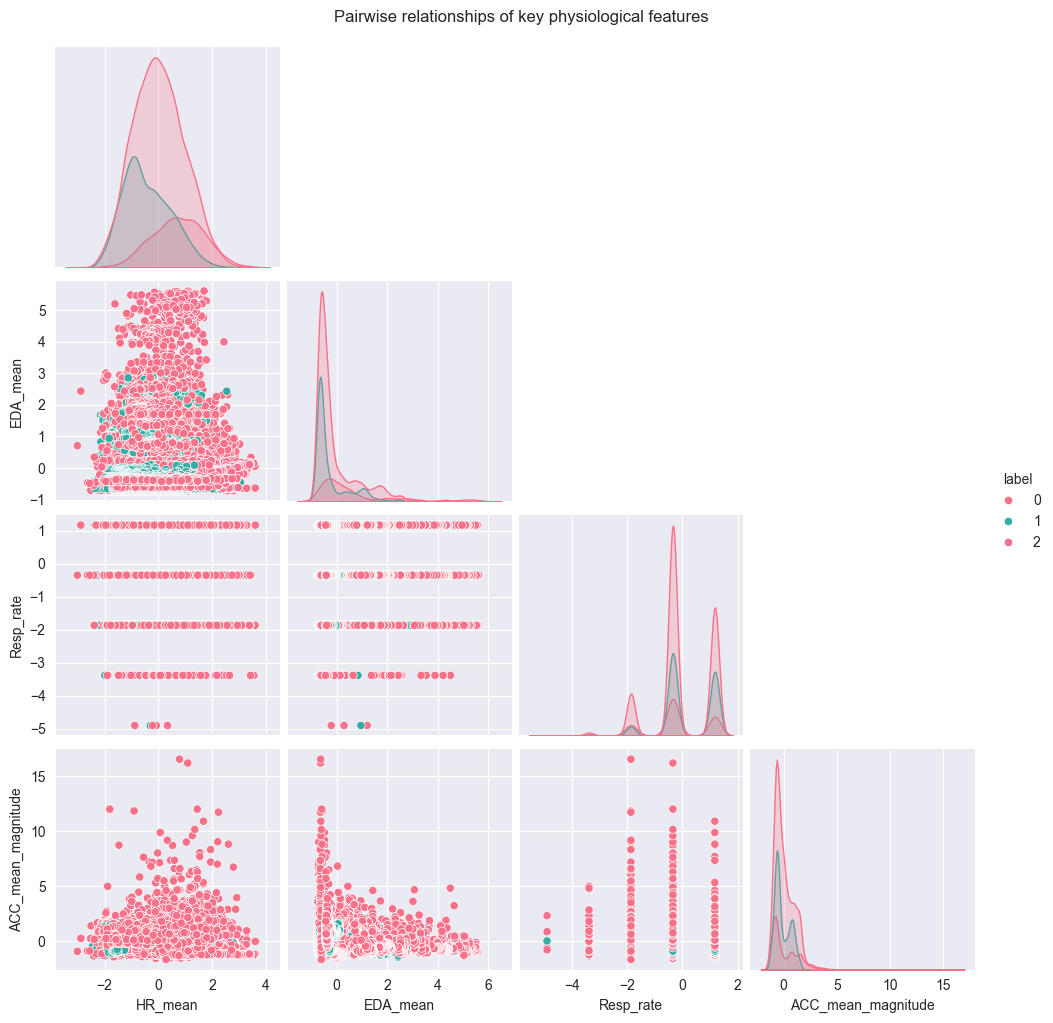

In [16]:
# ============================================================
# Pairwise feature relationships across emotional states
# ============================================================

selected_features = ["HR_mean", "EDA_mean", "Resp_rate", "ACC_mean_magnitude", "label"]
sns.pairplot(df[selected_features], hue="label", palette="husl", corner=True)
plt.suptitle("Pairwise relationships of key physiological features", y=1.02)
plt.show()


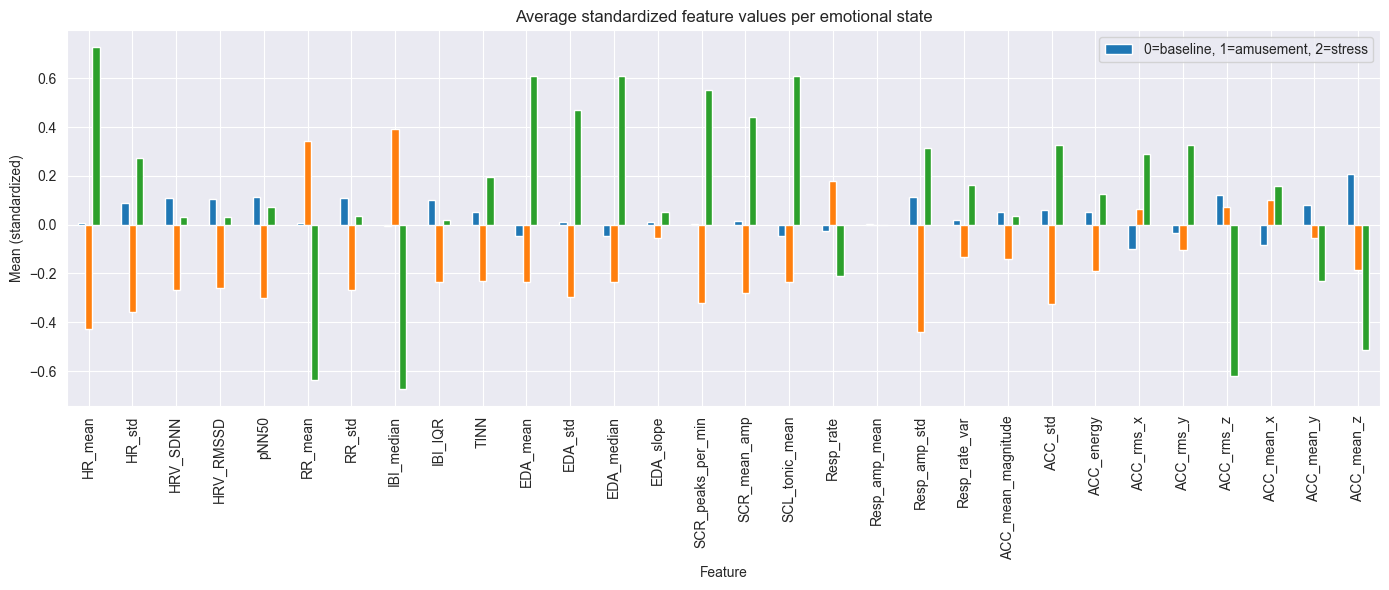

In [17]:
# ============================================================
# Mean feature values across emotional states
# ============================================================

mean_per_label = df.groupby("label")[feature_cols].mean().T
mean_per_label.plot(kind="bar", figsize=(14,6))
plt.title("Average standardized feature values per emotional state")
plt.xlabel("Feature")
plt.ylabel("Mean (standardized)")
plt.legend(["0=baseline, 1=amusement, 2=stress"])
plt.tight_layout()
plt.show()


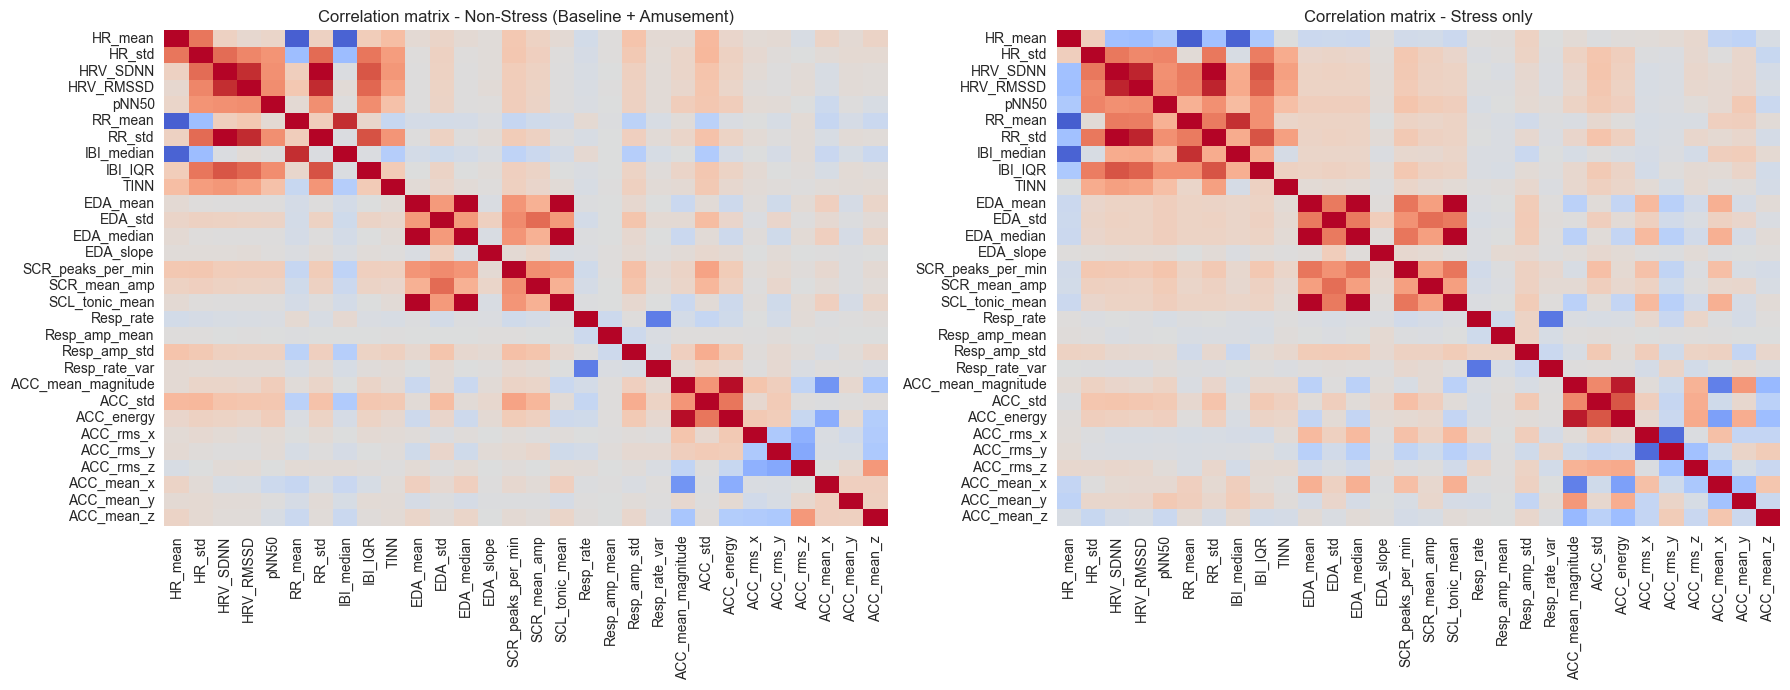

In [18]:
# ============================================================
# Correlation structure: Stress vs Non-Stress
# ============================================================

corr_stress = df[df["binary_label"] == 1][feature_cols].corr()
corr_nonstress = df[df["binary_label"] == 0][feature_cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(18,7))
sns.heatmap(corr_nonstress, ax=axes[0], cmap="coolwarm", center=0, cbar=False)
axes[0].set_title("Correlation matrix - Non-Stress (Baseline + Amusement)")
sns.heatmap(corr_stress, ax=axes[1], cmap="coolwarm", center=0, cbar=False)
axes[1].set_title("Correlation matrix - Stress only")
plt.tight_layout()
plt.show()


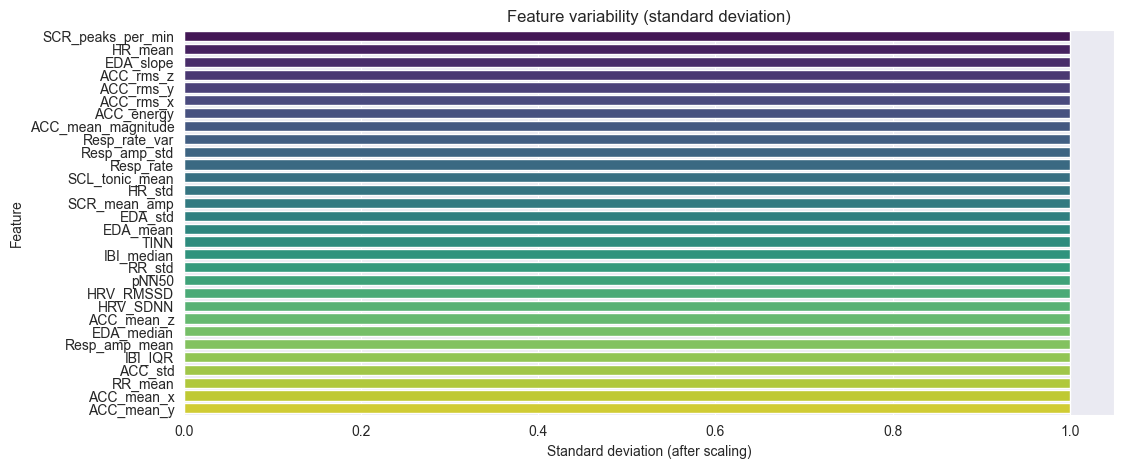

In [19]:
# ============================================================
# Feature variability overview (warning-free for Seaborn ≥ 0.14)
# ============================================================

feature_variability = df[feature_cols].std().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(
    x=feature_variability.values,
    y=feature_variability.index,
    hue=feature_variability.index,  
    palette="viridis",
    legend=False
)
plt.title("Feature variability (standard deviation)")
plt.xlabel("Standard deviation (after scaling)")
plt.ylabel("Feature")
plt.show()


Using 16 common features


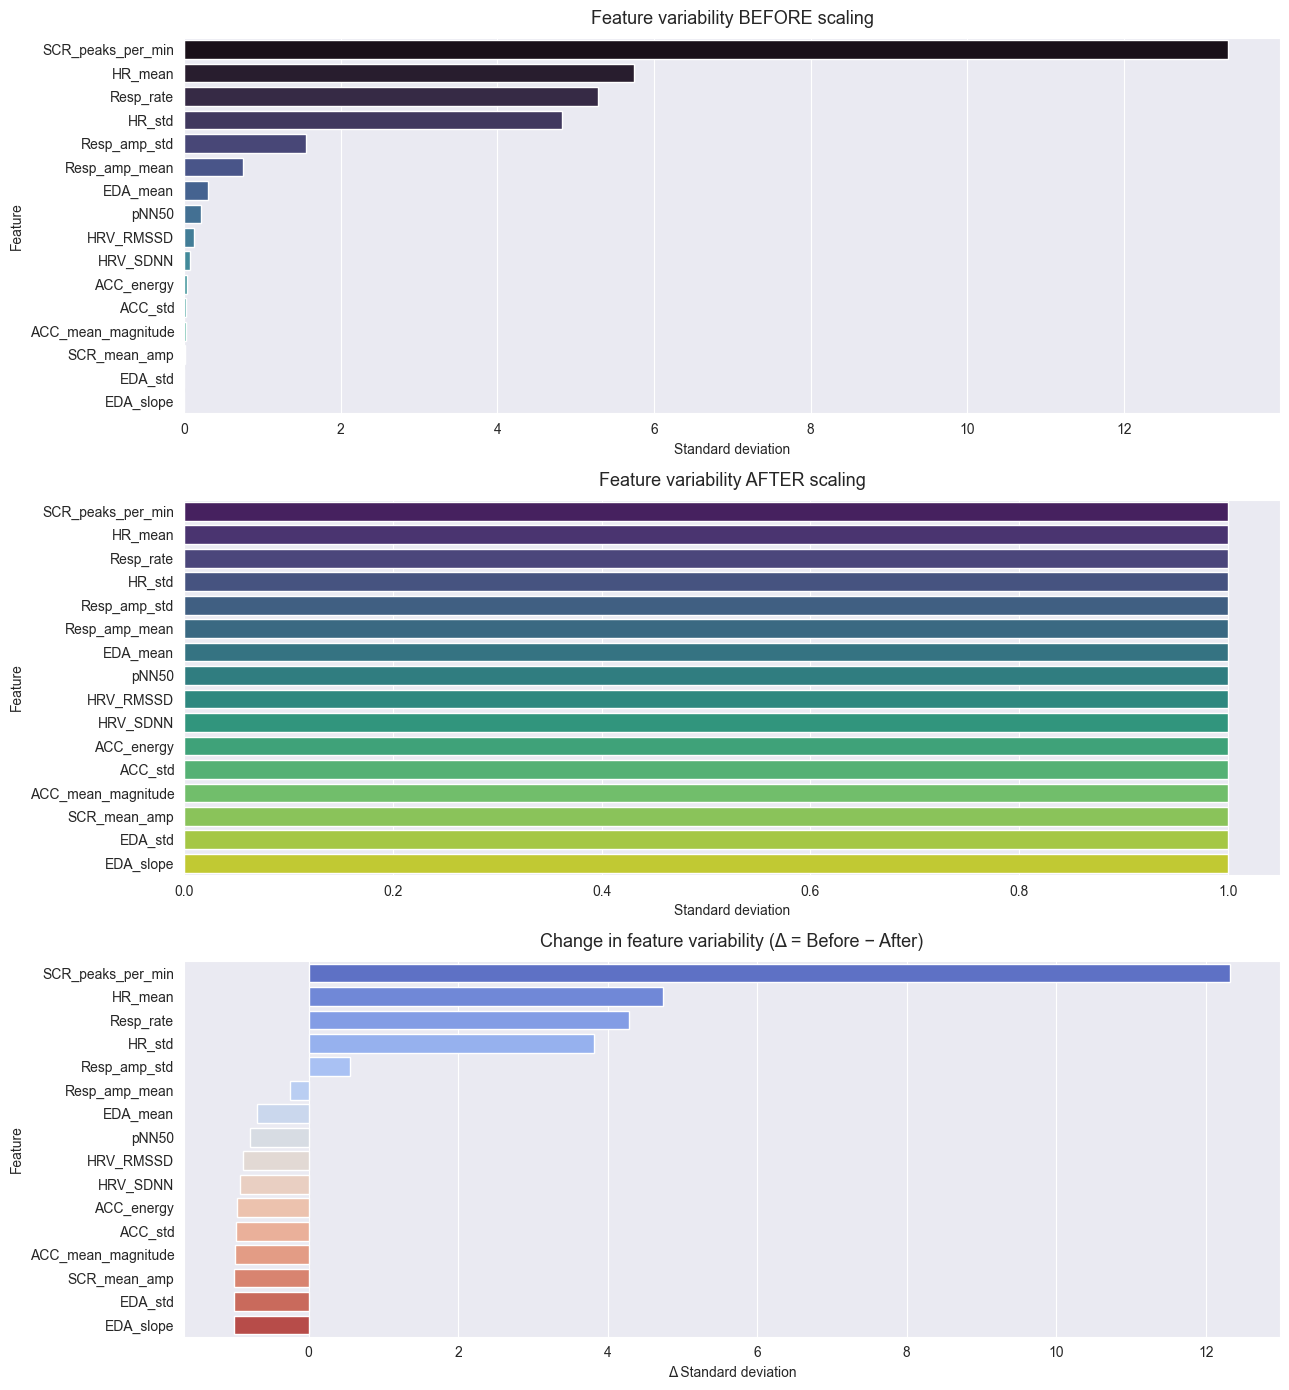

In [21]:
# ============================================================
# Feature variability BEFORE vs AFTER scaling + Δ difference
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")

# 1 Wczytaj dane PRZED i PO skalowaniu
df_before = pd.read_csv("../features_wesad.csv")          # surowe dane z feature extraction
df_after = pd.read_csv("wesad_cleaned_ready.csv")      # dane po scalingu (02_data_cleaning)

# 2  Ustal wspólne kolumny cech (bez etykiet)
feature_cols = [c for c in df_after.columns if c not in ["subject", "label", "binary_label"]]

# 🔥 FIX: tylko kolumny, które istnieją zarówno PRZED jak i PO
common_cols = [c for c in feature_cols if c in df_before.columns]

print(f"Using {len(common_cols)} common features")

# 3 Oblicz odchylenie standardowe (zmienność)
variability_before = df_before[common_cols].std(numeric_only=True)
variability_after  = df_after[common_cols].std(numeric_only=True)

# 4 Posortuj według największej zmienności przed skalowaniem
variability_before = variability_before.sort_values(ascending=False)
variability_after = variability_after.reindex(variability_before.index)


# 5 Połącz dane w jedną ramkę
variability_df = pd.DataFrame({
    "Before scaling": variability_before,
    "After scaling": variability_after
}).reset_index().rename(columns={"index": "Feature"})

# 6 Dodaj różnicę Δ
variability_df["Δ difference"] = variability_df["Before scaling"] - variability_df["After scaling"]

# ============================================================
# Wizualizacja
# ============================================================

fig, axes = plt.subplots(3, 1, figsize=(13, 14))
fig.subplots_adjust(hspace=0.5)

# --- 1 PRZED skalowaniem ---
sns.barplot(
    data=variability_df,
    x="Before scaling",
    y="Feature",
    hue="Feature",
    palette="mako",
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Feature variability BEFORE scaling", fontsize=13, pad=10)
axes[0].set_xlabel("Standard deviation")
axes[0].set_ylabel("Feature")

# --- 2 PO skalowaniu ---
sns.barplot(
    data=variability_df,
    x="After scaling",
    y="Feature",
    hue="Feature",
    palette="viridis",
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Feature variability AFTER scaling", fontsize=13, pad=10)
axes[1].set_xlabel("Standard deviation")
axes[1].set_ylabel("Feature")

# --- 3 Różnica (Δ) ---
sns.barplot(
    data=variability_df,
    x="Δ difference",
    y="Feature",
    hue="Feature",
    palette="coolwarm",
    legend=False,
    ax=axes[2]
)
axes[2].set_title("Change in feature variability (Δ = Before − After)", fontsize=13, pad=10)
axes[2].set_xlabel("Δ Standard deviation")
axes[2].set_ylabel("Feature")

plt.tight_layout()
plt.show()


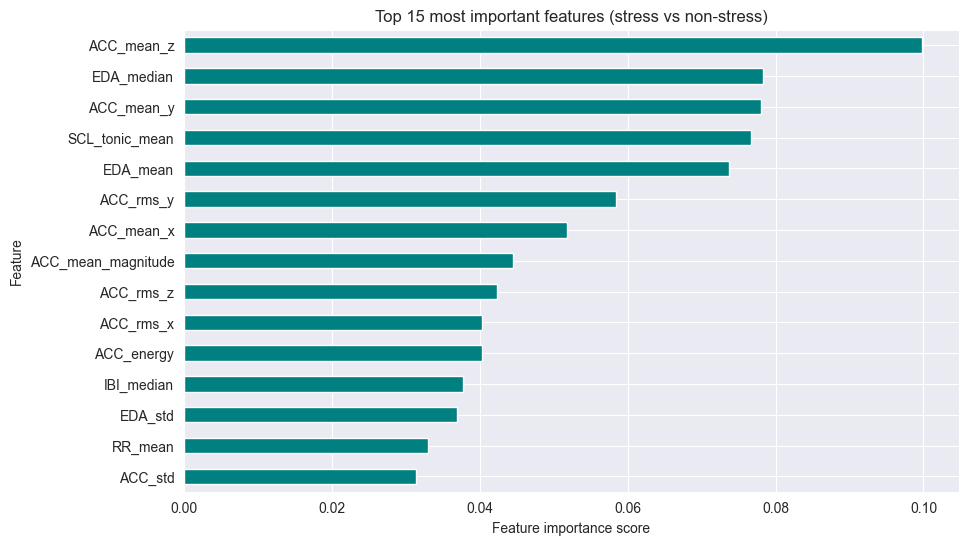

PCA zachowuje 33.16% całkowitej wariancji danych
PC1: 19.10% | PC2: 14.06%


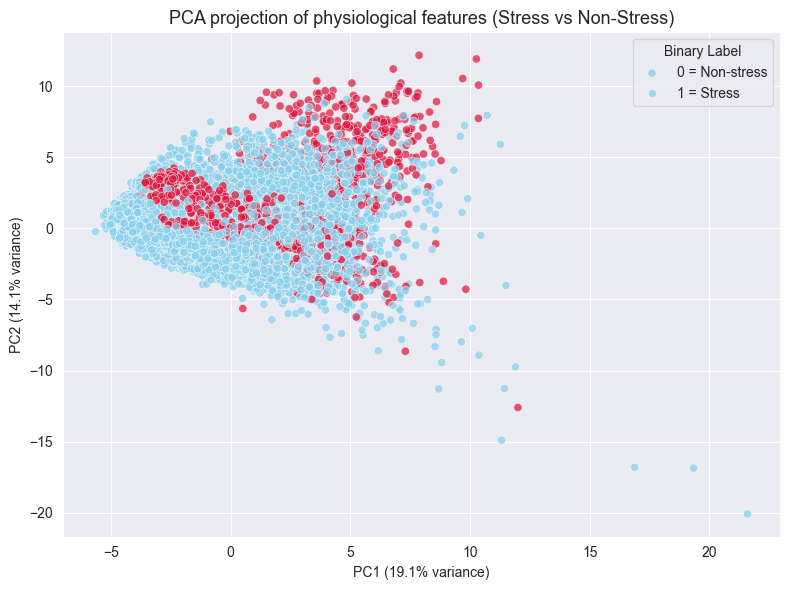

In [18]:
from sklearn.ensemble import RandomForestClassifier

# ============================================================
# Feature importance preview using RandomForest
# ============================================================


X = df[feature_cols]
y = df["binary_label"]  # stress vs non-stress

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=True)

plt.figure(figsize=(10,6))
importances.tail(15).plot(kind="barh", color="teal")
plt.title("Top 15 most important features (stress vs non-stress)")
plt.xlabel("Feature importance score")
plt.ylabel("Feature")
plt.show()
# ============================================================
# 🔍 PCA Visualization – Dimensionality Reduction
# ============================================================
# PCA (Principal Component Analysis) to metoda redukcji wymiarowości,
# która przekształca oryginalne cechy (np. HR_mean, EDA_mean itd.)
# na nowe osie (składowe główne), które:
#   1 maksymalizują wariancję (czyli informację) w danych
#   2 są ortogonalne (niezależne od siebie)
# Dzięki temu można zobaczyć, czy klasy (np. stress vs non-stress)
# dają się wizualnie oddzielić w przestrzeni 2D.

from sklearn.decomposition import PCA

# Przygotuj dane wejściowe (tylko cechy numeryczne)
X = df[feature_cols]
y = df["binary_label"]

# Utwórz i dopasuj PCA (2 główne komponenty)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Przekształć do DataFrame dla wizualizacji
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["binary_label"] = y

# Sprawdź, ile wariancji zachowano (czyli ile "informacji")
explained_var = pca.explained_variance_ratio_ * 100
print(f"PCA zachowuje {explained_var.sum():.2f}% całkowitej wariancji danych")
print(f"PC1: {explained_var[0]:.2f}% | PC2: {explained_var[1]:.2f}%")

# ============================================================
# Wizualizacja 2D: przestrzeń cech po PCA
# ============================================================

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="binary_label",
    palette={0: "skyblue", 1: "crimson"},
    alpha=0.7
)
plt.title("PCA projection of physiological features (Stress vs Non-Stress)", fontsize=13)
plt.xlabel(f"PC1 ({explained_var[0]:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]:.1f}% variance)")
plt.legend(title="Binary Label", labels=["0 = Non-stress", "1 = Stress"])
plt.tight_layout()
plt.show()

# ============================================================
# Interpretacja:
# Jeśli punkty (0 i 1) tworzą częściowo rozdzielne grupy,
# oznacza to, że cechy zawierają informację umożliwiającą
# rozróżnienie stresu i niestresu bez nadzorowanego uczenia.
# Gdy grupy się mieszają – klasyfikacja będzie trudniejsza,
# ale możliwa przy użyciu bardziej złożonych modeli.
# ============================================================


Using 30 valid features for PCA
PCA zachowuje 33.16% całkowitej wariancji danych
PC1: 19.10% | PC2: 14.06%


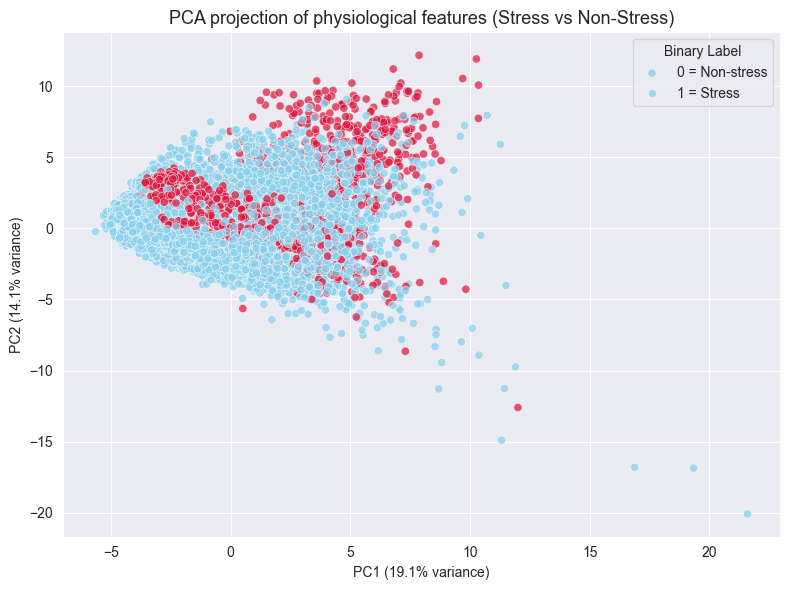

In [22]:
# ============================================================
# PCA Visualization – Dimensionality Reduction
# ============================================================

from sklearn.decomposition import PCA

# Przygotuj dane wejściowe (tylko cechy numeryczne)
# — dynamicznie sprawdzamy, które kolumny rzeczywiście istnieją
feature_cols = [c for c in feature_cols if c in df.columns]
print(f"Using {len(feature_cols)} valid features for PCA")

X = df[feature_cols]
y = df["binary_label"]

# Utwórz i dopasuj PCA (2 główne komponenty)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Przekształć do DataFrame dla wizualizacji
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["binary_label"] = y

# Sprawdź, ile wariancji zachowano (czyli ile "informacji")
explained_var = pca.explained_variance_ratio_ * 100
print(f"PCA zachowuje {explained_var.sum():.2f}% całkowitej wariancji danych")
print(f"PC1: {explained_var[0]:.2f}% | PC2: {explained_var[1]:.2f}%")

# ============================================================
# Wizualizacja 2D: przestrzeń cech po PCA
# ============================================================

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="binary_label",
    palette={0: "skyblue", 1: "crimson"},
    alpha=0.7
)
plt.title("PCA projection of physiological features (Stress vs Non-Stress)", fontsize=13)
plt.xlabel(f"PC1 ({explained_var[0]:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]:.1f}% variance)")
plt.legend(title="Binary Label", labels=["0 = Non-stress", "1 = Stress"])
plt.tight_layout()
plt.show()

# ============================================================
# Interpretacja:
# PCA (Principal Component Analysis) przekształca dane do 2D
# zachowując jak najwięcej informacji (wariancji).
# Jeżeli punkty (stress / non-stress) tworzą widoczne grupy —
# oznacza to, że Twoje cechy dobrze rozróżniają te stany.
# ============================================================
